# Relatorio de análise VII

## Criando agrupamentos

In [22]:
import pandas as pd

In [23]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

In [24]:
dados


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21872,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21873,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21874,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21875,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


In [25]:
dados.mean()

Quartos          2.522421
Vagas            1.309549
Suites           0.957764
Area           137.973305
Valor         5040.372080
Condominio    1560.768341
IPTU           575.976734
Valor M2        35.884625
dtype: float64

In [26]:
bairros = ['Centro', 'Copacabana', 'Ipanema', 'Botafogo']
selecao = dados['Bairro'].isin(bairros)

dados_bairro = dados[selecao]
list(dados_bairro['Bairro'].drop_duplicates())




['Copacabana', 'Centro', 'Ipanema', 'Botafogo']

In [27]:
grupo_bairro = dados_bairro.groupby('Bairro')

In [28]:
grupo_bairro['Valor'].mean().round(2)

Bairro
Botafogo      8791.83
Centro        1256.34
Copacabana    4120.05
Ipanema       9334.64
Name: Valor, dtype: float64

In [29]:
grupo_bairro.groups


{'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 335, 363, 416, 417, 499, 525, 527, 546, 595, 651, 687, 721, 758, 767, 824, 829, 863, 918, 927, 931, 1009, 1046, 1083, 1094, 1113, 1119, 1130, 1143, 1168, 1204, 1208, 1226, 1253, 1285, 1298, 1307, 1320, 1351, 1386, 1417, 1422, 1458, 1520, 1532, 1582, 1633, 1658, 1673, 1702, 1744, 1745, 1791, 1817, 1826, 1829, 1856, 1925, 1934, 1960, 1975, 1984, 1992, 2033, 2070, 2073, 2085, 2087, 2088, 2092, 2101, 2152, 2153, 2169, 2184, 2202, 2247, 2252, 2302, 2357, 2386, 2401, 2418, 2436, 2438, 2475, 2514, 2524, 2537, 2585, ...], 'Centro': [2, 38, 65, 71, 146, 181, 191, 313, 428, 587, 667, 828, 872, 942, 947, 957, 1019, 1114, 1118, 1139, 1324, 1388, 1486, 1499, 1616, 1636, 1694, 1700, 1736, 1740, 1848, 1894, 1904, 2010, 2089, 2102, 2160, 2172, 2196, 2241, 2244, 2263, 2331, 2450, 2471, 2610, 2619, 2977, 3082, 3088, 3096, 3248, 3286, 3337, 3338, 3351, 3490, 3539, 3585, 3699, 3781, 3874, 3918, 3938, 3946, 4035, 4037, 4052, 4187, 4337, 4381,

In [30]:
for b, d in grupo_bairro:
    print(d)

              Tipo    Bairro  Quartos  Vagas  Suites  Area   Valor  \
23     Apartamento  Botafogo        2      1       0    76  2500.0   
48     Apartamento  Botafogo        3      1       1   108  5950.0   
87     Apartamento  Botafogo        2      1       1    83  2800.0   
88     Apartamento  Botafogo        2      1       1    80  4300.0   
111    Apartamento  Botafogo        3      1       1   100  5500.0   
...            ...       ...      ...    ...     ...   ...     ...   
21711  Apartamento  Botafogo        2      0       0    60  1900.0   
21717  Apartamento  Botafogo        1      0       0    51  2000.0   
21766  Apartamento  Botafogo        2      1       1    52  3100.0   
21797  Apartamento  Botafogo        2      1       2    84  4230.0   
21841  Apartamento  Botafogo        3      2       1   100  4500.0   

       Condominio   IPTU  Valor M2 Tipo Agregado  
23          740.0    0.0     32.89   Apartamento  
48         1405.0  289.0     55.09   Apartamento  
87    

## Estatísticas Descritivas

In [31]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Centro,344.0,1256.34,883.87,400.0,800.0,1000.0,1400.0,12000.0
Copacabana,2656.0,4120.05,3605.32,100.0,2000.0,3000.0,4800.0,35000.0
Ipanema,1769.0,9334.64,8214.70,1200.0,4500.0,7000.0,11000.0,90000.0


In [32]:

import matplotlib as plt
plt.rc('figure', figsize = (20, 10))

<AxesSubplot:xlabel='Bairro'>

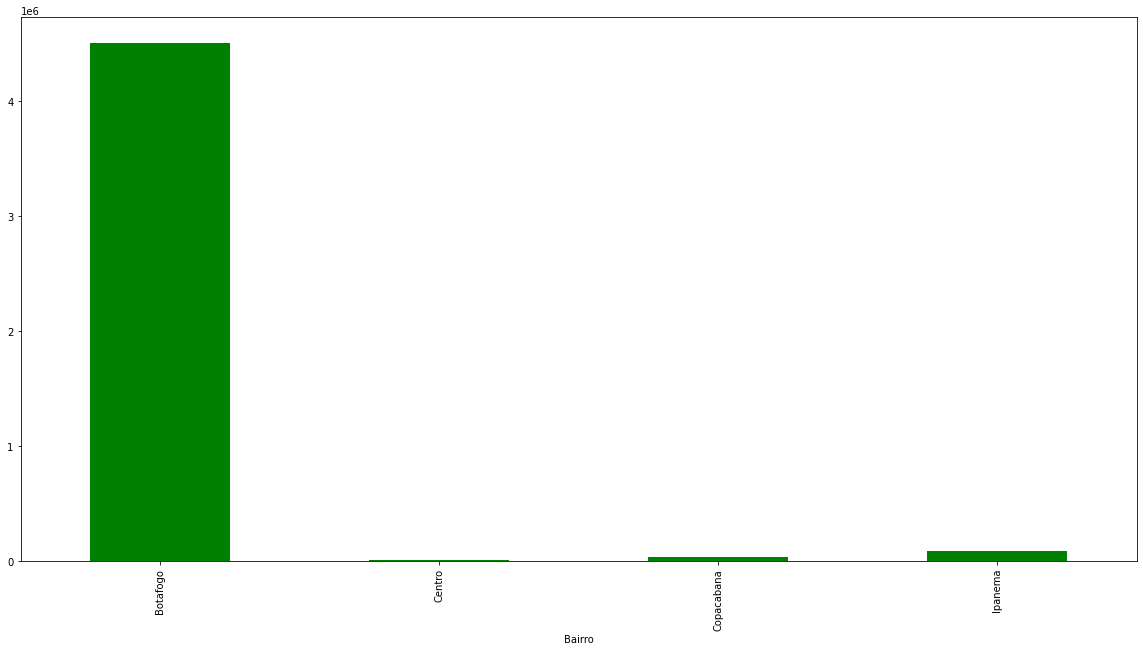

In [36]:
grupo_bairro['Valor'].max().plot.bar(color = 'green')